In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['agg.path.chunksize'] = 10000

%matplotlib inline

In [2]:
def ease_cubic(t):
    
    if t<=0:
        
        return 0
    
    elif t<= 0.5:
        
        return 4*t*t*t
    
    elif t<= 1:
        
        return 1 - 0.5*(2 + 2*t)*(2 + 2*t)*(2 + 2*t)
    
def ease_cubic_range(x,xmin,xmax):
    
    return xmin + (xmax-xmin)*ease_cubic((x-xmin)/(xmax-xmin))


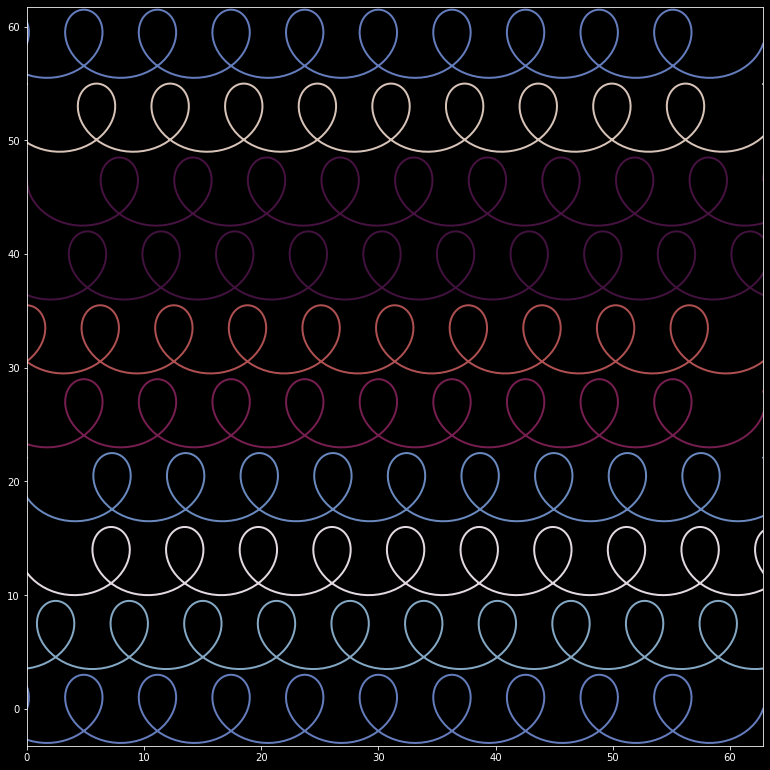

In [50]:
n_offsets = 10
n_turns = 10
omega = 2*np.pi
rball = 1
rpen = 3

separation_lines = 0.5
offsets = np.linspace(0,4*np.pi,n_offsets)
Ts = np.linspace(0,n_turns,500)

fig = plt.figure()
fig.set_size_inches((10.80,10.80))
fig.patch.set_alpha(1)
ax = plt.gca()

plt.style.use('dark_background')

plt.rcParams.update({"figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

hues = rball*offsets + rpen*np.cos(offsets)
hues = (hues%(4*np.pi*rball))/(4*np.pi*rball)

for count, (offset, hue) in enumerate(zip(offsets,hues)):
    
    Xs = rball*omega*Ts + rpen*np.cos(omega*Ts - offset) - rpen*np.cos(offset)
    Ys = rpen*np.sin(omega*Ts - offset) + (2*rpen+separation_lines)*count
    #color = mpl.colors.hsv_to_rgb([hue , 1 , 0.7])
    color = mpl.cm.twilight(hue)
    ax.plot(Xs,Ys,color=color,lw=2)

ax.set_ylim([-(rpen+0.5*separation_lines),(2*rpen+separation_lines)*(n_offsets-0.5)])
ax.set_xlim([0,rball*2*np.pi*n_turns])
#ax.set_aspect('equal')

fig.tight_layout()
plt.show()

KeyboardInterrupt: 

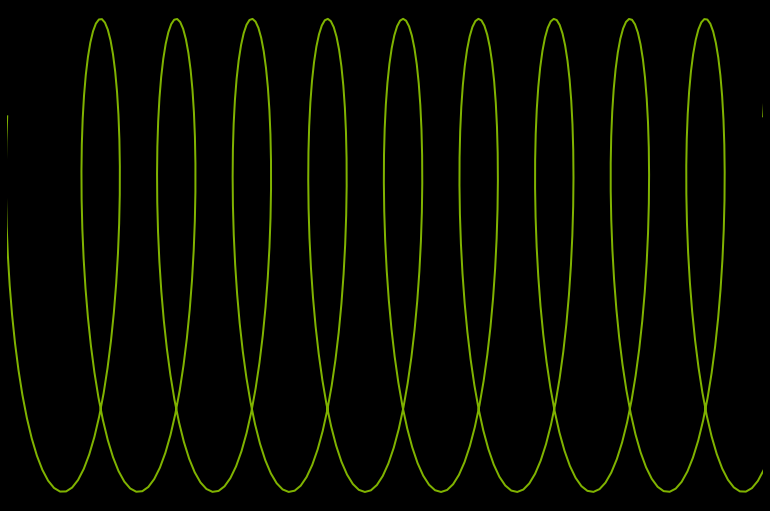

In [23]:
n_turns = 10
omega = 2*np.pi
rball = 1
rpen = 3

n_cycles = 10
cycles_per_second = 1

n_frames = int(60*n_cycles/cycles_per_second)
offset_deltas = np.linspace(0,2*np.pi*n_cycles,n_frames,endpoint=False)


offsets = np.linspace(0,2*np.pi,n_offsets)
Ts = np.linspace(0,n_turns,500)

fig = plt.figure()
fig.set_size_inches((10.80,7.20))
fig.patch.set_alpha(1)
ax = plt.gca()

maxhue = 2*np.pi*rball + rpen


for frame, offset in enumerate(offset_deltas):
    
    ax.cla()
    
    Xs = rball*omega*Ts + rpen*np.cos(omega*Ts - offset) - rpen*np.cos(offset)
    
    Ys = rpen*np.sin(omega*Ts - offset)

    hue = (rball*offset + rpen*np.cos(offset))
    hue = (hue%(2*np.pi*rball))/(2*np.pi*rball)
    
    
    color = mpl.colors.hsv_to_rgb([hue, 1 , 0.7 ])
    ax.plot(Xs,Ys,color=color,lw=2)

    ax.set_ylim([-1.05*rpen,1.05*rpen])
    ax.set_xlim([0,rball*2*np.pi*n_turns])
    ax.axis('off')
    fig.tight_layout()
    fig.savefig('animation/trochoid-single-%04d.png'%frame,dpi=100)
    
    print('Frame',frame+1,'of',n_frames,end='\r')
    
    
plt.show()

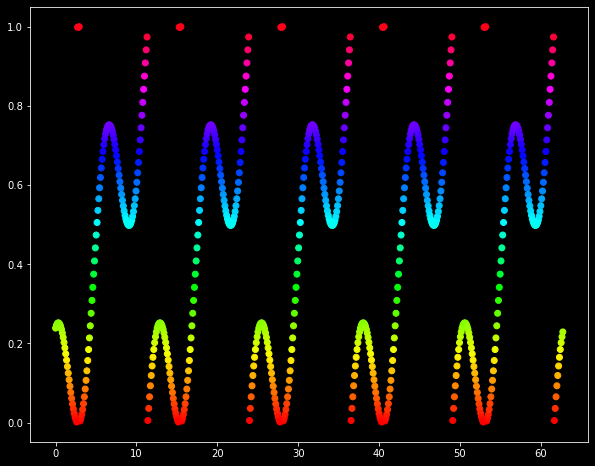

In [51]:
hues = rball*offset_deltas + rpen*np.cos(offset_deltas)
hues = (hues%(4*np.pi*rball))/(4*np.pi*rball)

plt.figure(figsize=(10,8))
plt.scatter(offset_deltas,hues,c=(hues)%(2*np.pi*rball),cmap='hsv')
plt.show()

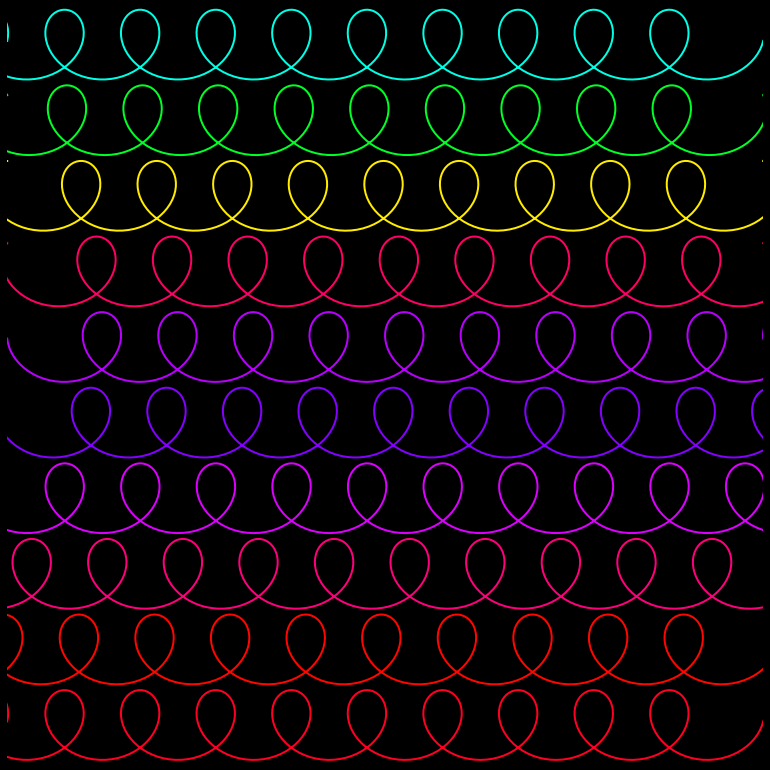

In [52]:
n_offsets = 10
n_turns = 10
omega = 2*np.pi
rball = 1
rpen = 3
separation_lines = 0.5

n_cycles = 10
cycles_per_second = 1

n_frames = int(60*n_cycles/cycles_per_second)
offset_deltas = np.linspace(0,2*np.pi*n_cycles,n_frames,endpoint=False)


offsets = np.linspace(0,2*np.pi,n_offsets)
Ts = np.linspace(0,n_turns,500)

fig = plt.figure()
fig.set_size_inches((10.80,10.80))
fig.patch.set_alpha(1)
ax = plt.gca()

maxhue = 2*np.pi*cycles_per_second/rball + rpen


for frame, offset_delta in enumerate(offset_deltas):
    
    ax.cla()
    
    hues = rball*(offsets+offset_delta) + rpen*np.cos(offsets+offset_delta) -rpen*np.cos(offset_delta)
    hues = (hues%(4*np.pi*rball))/(4*np.pi*rball)
        
    for count, (offset,hue) in enumerate(zip(offsets+offset_delta,hues)):

        Xs = rball*omega*Ts + rpen*np.cos(omega*Ts - offset) - rpen*np.cos(offset)
        Ys = rpen*np.sin(omega*Ts - offset) + (2*rpen+separation_lines)*count
        
        color = mpl.cm.hsv(hue)
        ax.plot(Xs,Ys,color=color,lw=2)

    ax.set_ylim([-(rpen+0.5*separation_lines),(2*rpen+separation_lines)*(n_offsets-0.5)])
    ax.set_xlim([0,rball*2*np.pi*n_turns])
    ax.axis('off')
    fig.tight_layout()
    fig.savefig('animation/trochoid%04d.png'%frame,dpi=100)
    
    print('Frame',frame+1,'of',n_frames,end='\r')
    
    
plt.show()

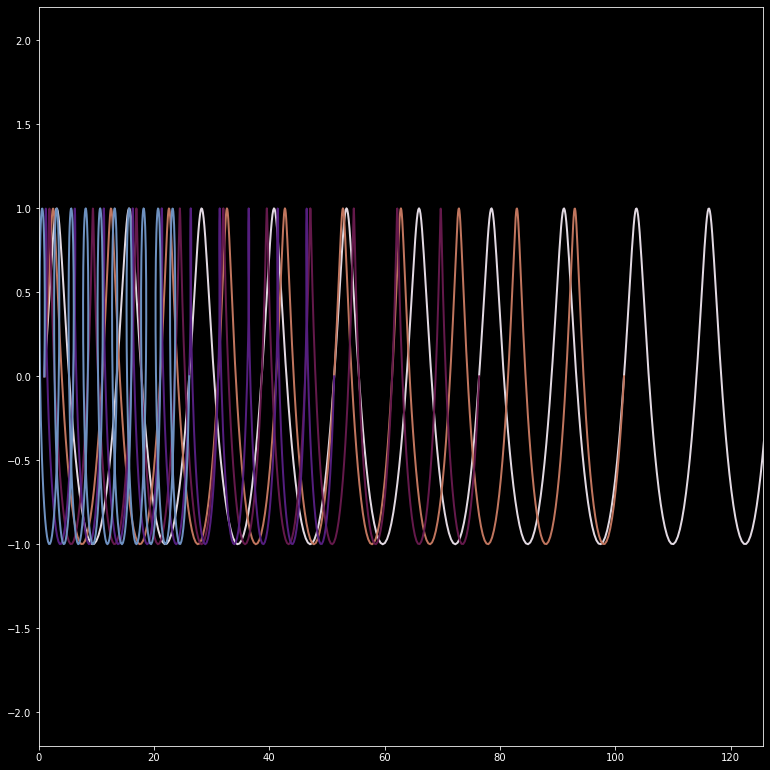

In [7]:
n_radii = 5
n_turns = 10
omega = 2*np.pi
rball_max = 2
rpen = 1

separation_lines = 0.5
ball_radii = np.linspace(rball_max,0,n_radii,endpoint=False)
Ts = np.linspace(0,n_turns,500)

fig = plt.figure()
fig.set_size_inches((10.80,10.80))
fig.patch.set_alpha(1)
ax = plt.gca()

plt.style.use('dark_background')

plt.rcParams.update({"figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

for count, rball in enumerate(ball_radii):
    
    Xs = rball*omega*Ts + rpen*np.cos(omega*Ts)
    Ys = rpen*np.sin(omega*Ts)

    color = mpl.cm.twilight(rball/rball_max)
    ax.plot(Xs,Ys,color=color,lw=2)

ax.set_ylim([-1.1*rball_max,1.1*rball_max])
ax.set_xlim([0,rball_max*2*np.pi*n_turns])
#ax.set_aspect('equal')

fig.tight_layout()
plt.show()